## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2351  2022-09-01 00:00:00     php   3498
2352  2022-09-01 00:00:00  python  20657
2353  2022-09-01 00:00:00       r   4047
2354  2022-09-01 00:00:00    ruby    478
2355  2022-09-01 00:00:00   swift   1840


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
print(df.shape)

(2356, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2356
TAG      2356
POSTS    2356
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby('TAG').sum()


C:\Users\davib\AppData\Local\Temp\ipykernel_4640\390715221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


,POSTS
TAG,
assembly,41154
c,385393
c#,1558857
c++,776310
delphi,50086
go,64511
java,1864408
javascript,2424439
perl,67121


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby('TAG').count()["DATE"]

TAG
assembly      170
c             170
c#            171
c++           170
delphi        170
go            155
java          170
javascript    170
perl          170
php           170
python        170
r             168
ruby          170
swift         162
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [9]:
df.DATE[1]

'2008-08-01 00:00:00'

In [10]:
type(df.DATE[1])

str

In [11]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [12]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [13]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,158.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
print(reshaped_df.shape)

(171, 14)


In [15]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
# They are different because, there are DATES with no post of some languages
reshaped_df.count()

TAG
assembly      170
c             170
c#            171
c++           170
delphi        170
go            155
java          170
javascript    170
perl          170
php           170
python        170
r             168
ruby          170
swift         162
dtype: int64

In [17]:
reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,164.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1646.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,158.0,0.0


In [18]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

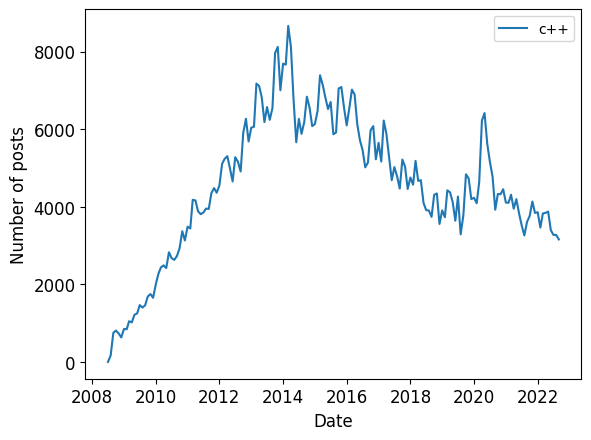

In [58]:
plt.Figure(figsize=(16, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.plot(reshaped_df.index, reshaped_df['c++'], label='c++')
plt.legend()


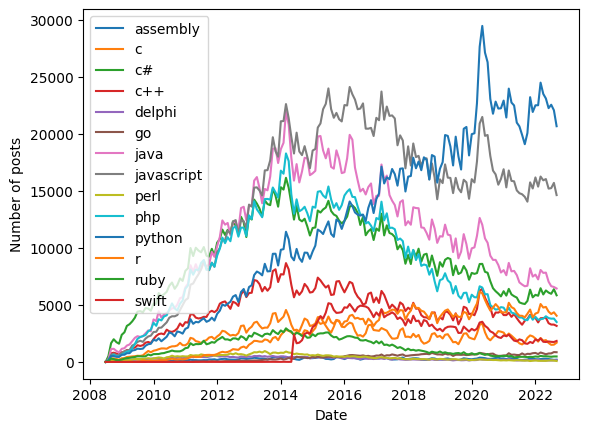

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

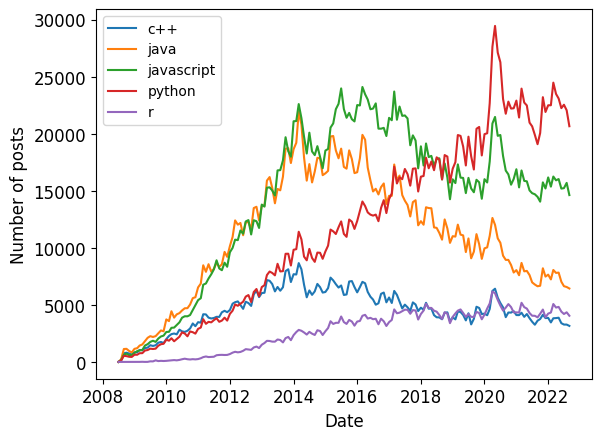

In [56]:
plt.Figure(figsize=(16, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.plot(reshaped_df.index, reshaped_df['c++'], label='c++')
plt.plot(reshaped_df.index, reshaped_df['java'], label='java')
plt.plot(reshaped_df.index, reshaped_df['javascript'], label='javascript')
plt.plot(reshaped_df.index, reshaped_df['python'], label='python')
plt.plot(reshaped_df.index, reshaped_df['r'], label='r')
plt.legend()

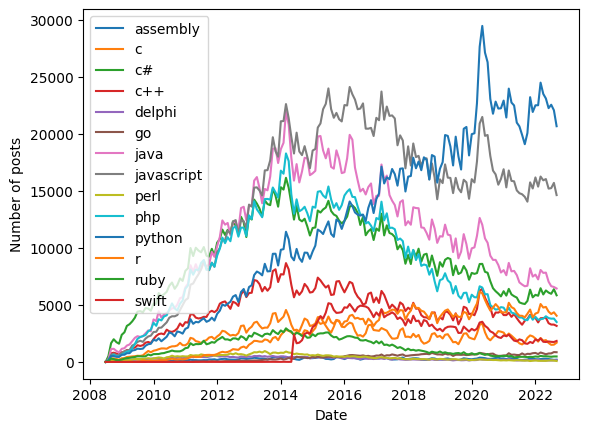

In [57]:
plt.Figure(figsize=(20, 10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of posts', fontsize=10)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,
             reshaped_df[column],
             linewidth=1.5,
             label=reshaped_df[column].name)
plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 